<a href="https://colab.research.google.com/github/syyang-sec/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_8%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오픈소스 기반 데이터 분석 8강

# 데이터 분석 방법론

## 8-1 통계적 모형을 활용한 분석 (statsmodels)

In [ ]:
import pandas as pd
import random
# statsmodels의 formula api 임포트

## 난수 시드 설정
random.seed(1)

## 데이터 생성
X = list(range(1, 11))
y = [2*x + 1 + random.gauss(0, 1) for x in X]

## 데이터프레임 생성
data = pd.DataFrame({'X': X, 'y': y})

## OLS(최소 제곱법) 회귀 모델 생성 및 학습
## 'y'를 종속 변수로 하고 다른 특성(X)을 독립 변수로 사용

## 모델 요약 결과 출력

## 8-2 기계학습을 활용한 분석 (scikit-learn)

In [ ]:
# scikit-learn의 앙상블(ensemble) 알고리즘 중 RandomForestClassifier 임포트
# 모델 평가를 위한 데이터 분할(split) 함수 임포트
# 모델의 정확도(accuracy)를 측정하는 함수 임포트
# 예제 데이터셋(유방암 데이터) 로드 함수 임포트

## 데이터 로드 및 분할
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

## 학습/테스트 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 랜덤 포레스트 모델 생성 및 학습

## 예측 및 정확도 평가

## 8-3 딥러닝을 활용한 분석 (tensorflow)

In [ ]:
from sklearn.metrics import classification_report
# 딥러닝 분석을 위한 tensorflow 임포트

## CIFAR-10 데이터셋 로드 및 전처리
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

## MobileNetV2 기반 모델 구축
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(160, 160, 3))
base_model.trainable = False
model = tf.keras.Sequential([
    tf.keras.layers.Resizing(160, 160),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10)
])

## 모델 컴파일
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 모델 학습
model.fit(x_train, y_train, epochs=3, validation_split=0.2)

## 예측 및 성능 평가
y_pred = tf.argmax(model.predict(x_test), axis=1)
print("\nTest Accuracy:", model.evaluate(x_test, y_test, verbose=0)[1])
print("\nClassification Report:\n", classification_report(y_test, y_pred))

## 8-4 EDA 예시

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

## 당뇨병 데이터셋 로드 및 데이터프레임 생성
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

## dataframe의 describe를 이용하여 기본 통계량 출력

## 상관 행렬 시각화
plt.figure(figsize=(12,8))
# dataframe의 각 열(변수)들 간의 상관 계수(correlation coefficient)를 계산하고 corr_matrix로 저장
# seaborn으로 corr_matrix를 heatmap으로 시각화
plt.title('Diabetes Dataset Correlation Matrix')
plt.show()

## 8-5 기술통계량 분석

In [ ]:
import pandas as pd
import seaborn as sns

## 아이리스 데이터셋 로드
df = sns.load_dataset('iris')

# 기술 통계량
print("=== 기본 통계량 ===")
print(df.describe())

# 데이터 미리보기
print("\n=== 데이터 미리보기 ===")

# 그룹별 통계정보
print("\n=== 품종별 평균값 ===")

## 8-6 데이터 시각화 분석

In [2]:
# 한글 처리를 위한 matplotlib 설정 (1)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


- 리소스 재시작

In [1]:
# 한글 처리를 위한 matplotlib 설정 (2)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

/tmp/ipython-input-2971425508.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


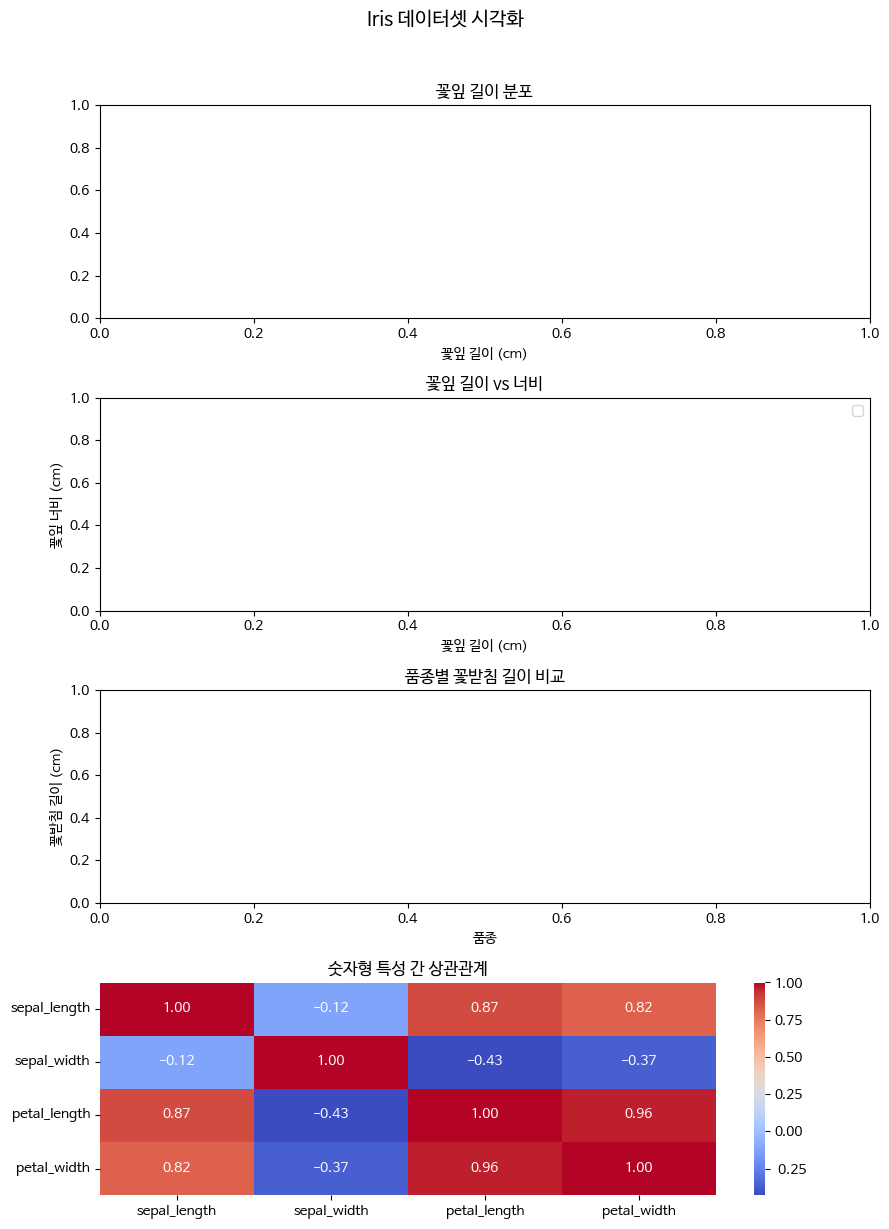

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## 아이리스 데이터셋 로드
df = sns.load_dataset('iris')

## 서브플롯 설정
plt.figure(figsize=(9, 12))
plt.suptitle('Iris 데이터셋 시각화', y=1.02, fontsize=14)

## 첫 번째 서브플롯: 꽃잎 길이 분포 (히스토그램)
plt.subplot(4, 1, 1)
# seaborn을 이용하여 petal_length를 10개 구간으로 나누어 히스토그램 표시
plt.title('꽃잎 길이 분포')
plt.xlabel('꽃잎 길이 (cm)')

## 두 번째 서브플롯: 꽃잎 길이 vs 너비 (산점도)
plt.subplot(4, 1, 2)
species_list = df['species'].unique()
colors = {'setosa':'red', 'versicolor':'green', 'virginica':'blue'}

for species in species_list:
    species_data = df[df['species'] == species]
    # matplotlib를 이용하여 길이, 넓이를 산점도로 표시
plt.title('꽃잎 길이 vs 너비')
plt.xlabel('꽃잎 길이 (cm)')
plt.ylabel('꽃잎 너비 (cm)')
plt.legend()

## 세 번째 서브플롯: 품종별 꽃받침 길이 (박스플롯)
plt.subplot(4, 1, 3)
# seaborn을 이용하여 품종 별 꽃받침 길이를 박스플롯으로 표시
plt.title('품종별 꽃받침 길이 비교')
plt.xlabel('품종')
plt.ylabel('꽃받침 길이 (cm)')

## 네 번째 서브플롯: 숫자형 특성 간 상관관계 (히트맵)
plt.subplot(4, 1, 4)
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('숫자형 특성 간 상관관계')

## 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

## 8-7 자동화된 EDA 도구

In [ ]:
!pip install ydata_profiling

In [ ]:
import seaborn as sns
from ydata_profiling import ProfileReport

## 아이리스 데이터셋 로드
df = sns.load_dataset('iris')

## 데이터 프로파일링 보고서 생성

## HTML 파일로 보고서 저장

## 보고서 표시 (Jupyter Notebook 환경에서 보고서가 바로 표시됨)